In [73]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c013b70>]], dtype=object)

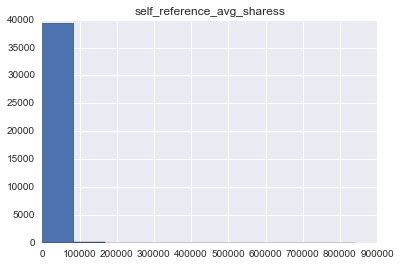

In [4]:
df.hist('self_reference_avg_sharess')

In [5]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [49]:
morethan1400 = []
for row in df['shares']:
    if row > 1400:
        morethan1400.append(1)
    else:
        morethan1400.append(0)
df['morethan1400']= morethan1400

In [64]:
columns = ['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

//anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)
//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


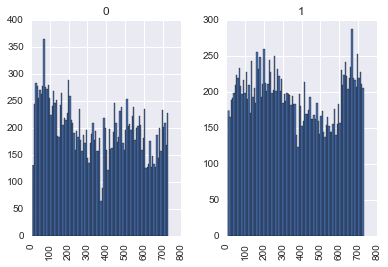

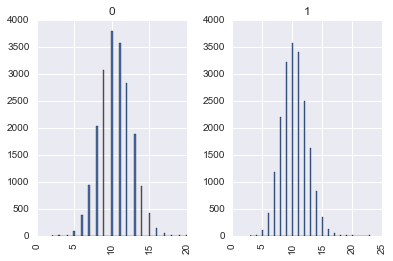

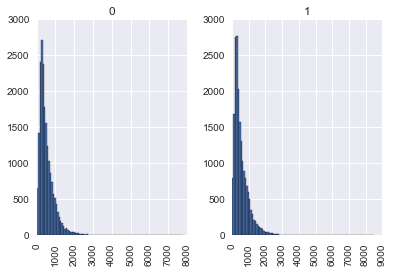

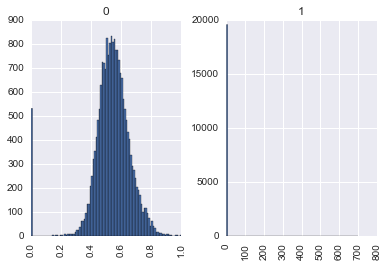

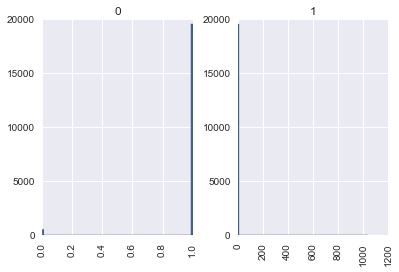

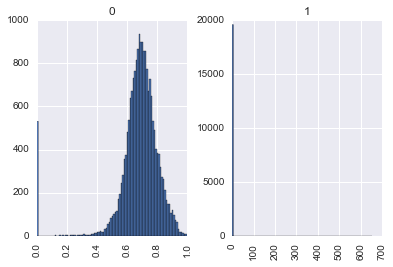

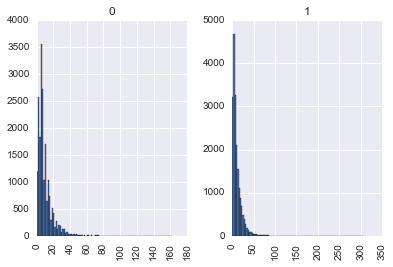

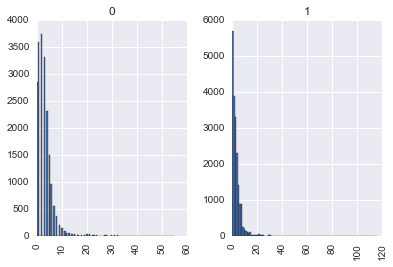

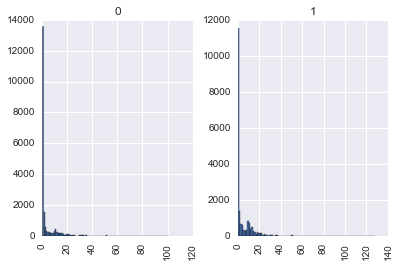

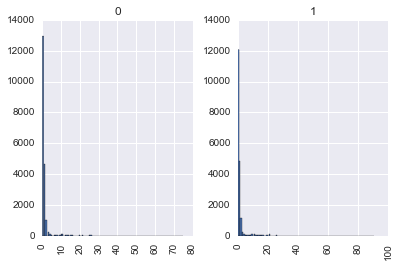

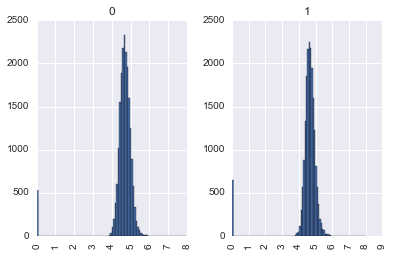

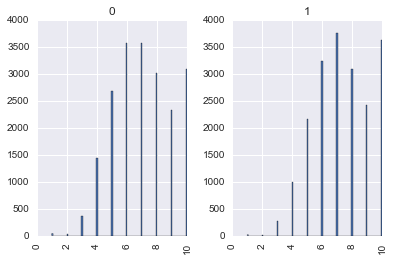

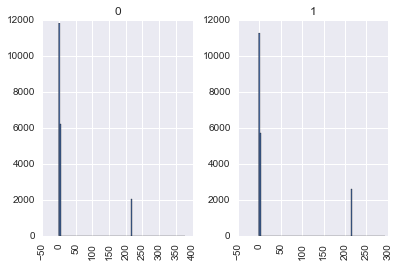

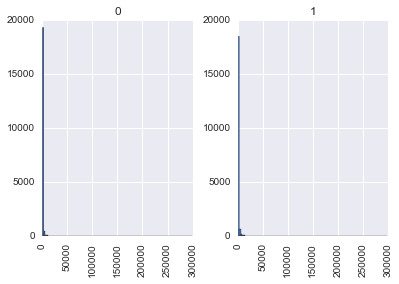

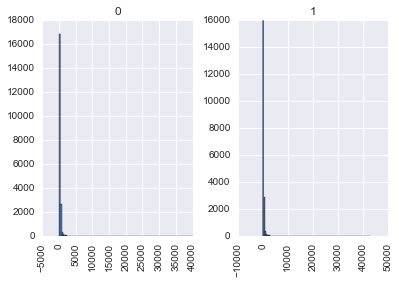

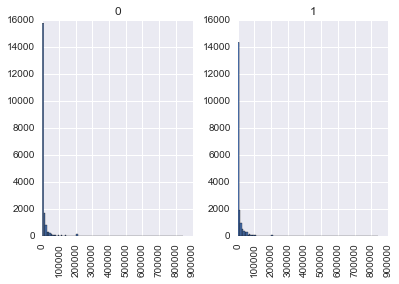

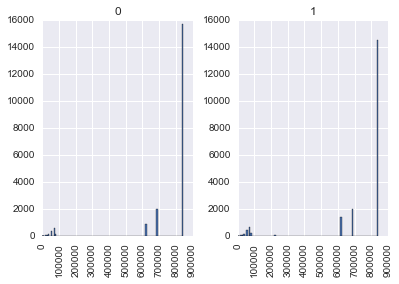

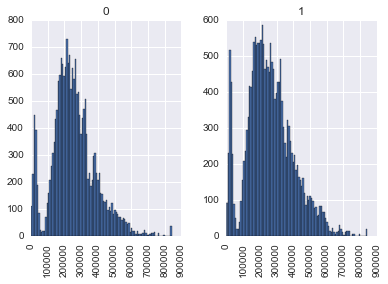

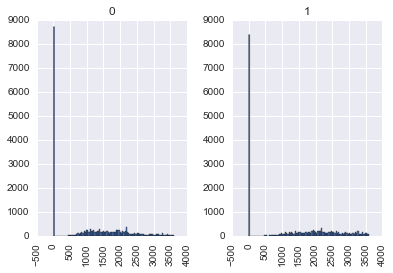

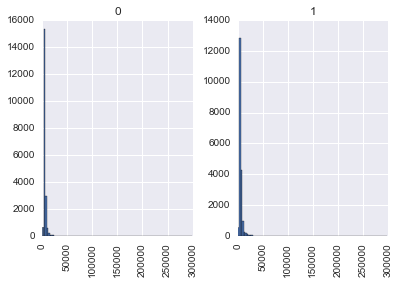

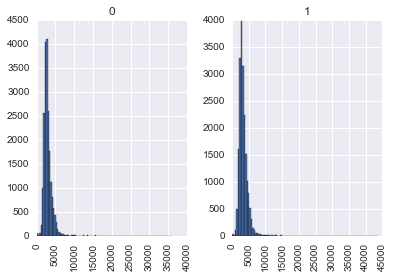

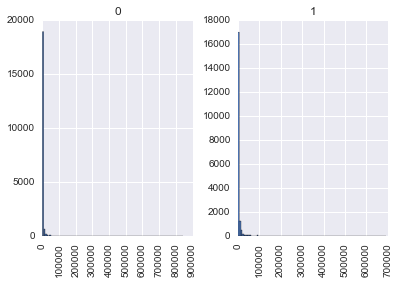

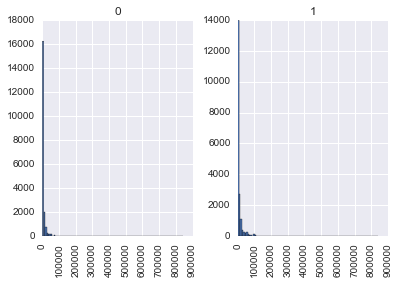

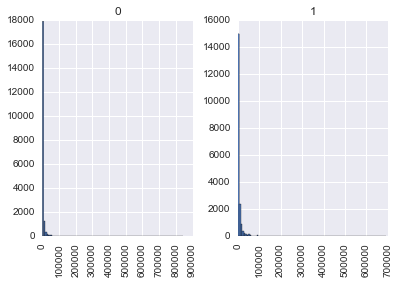

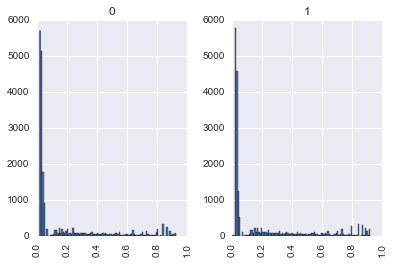

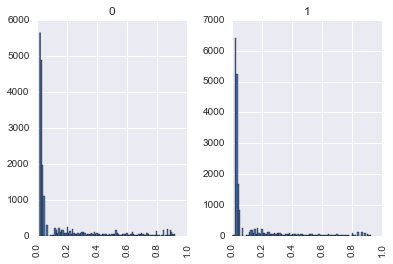

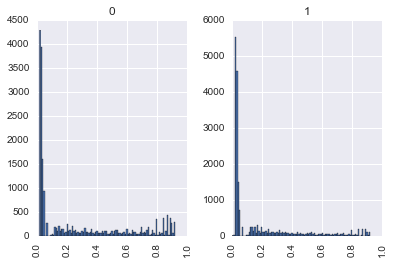

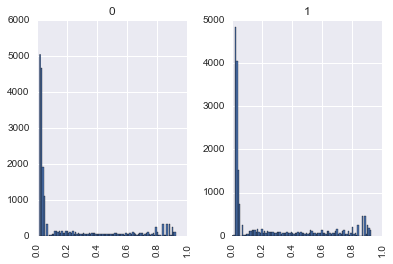

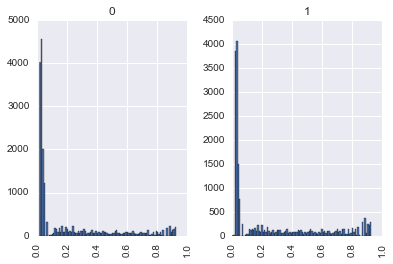

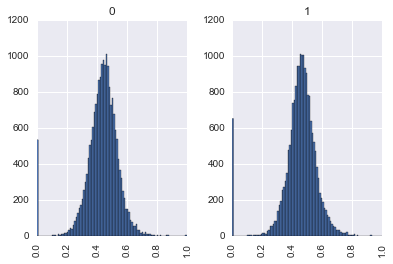

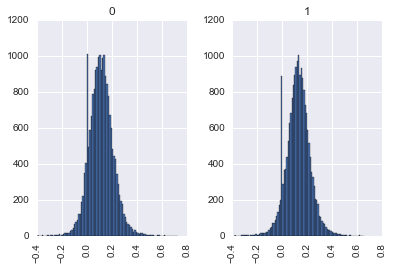

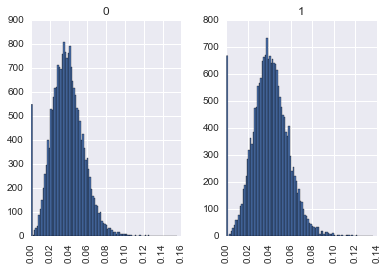

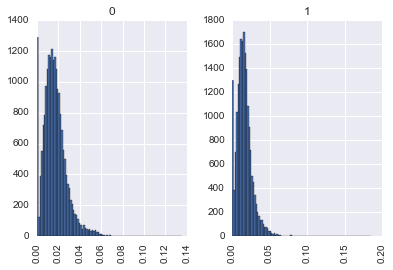

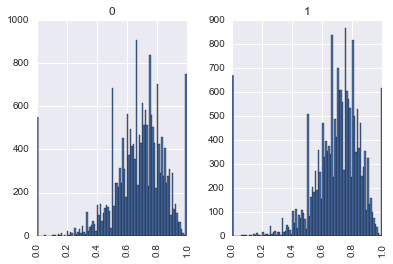

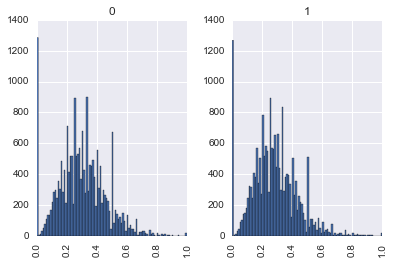

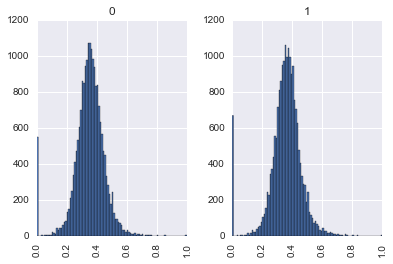

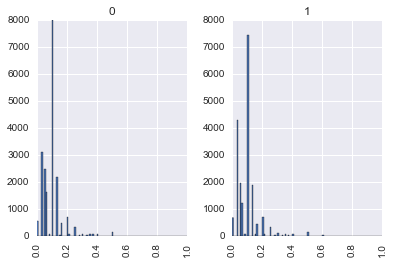

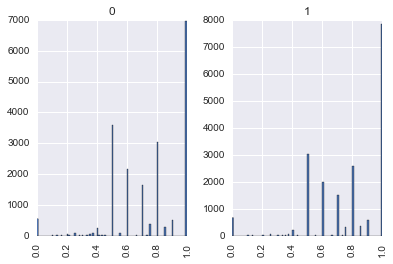

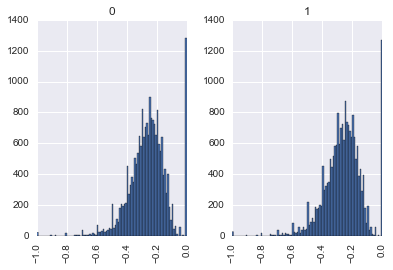

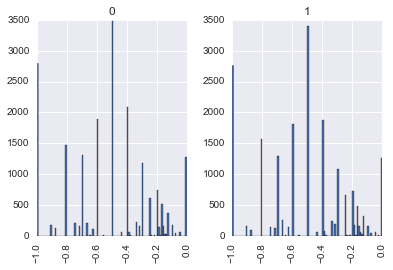

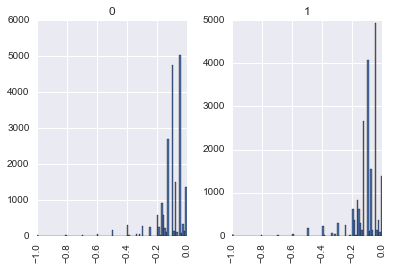

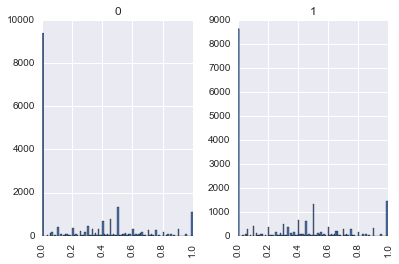

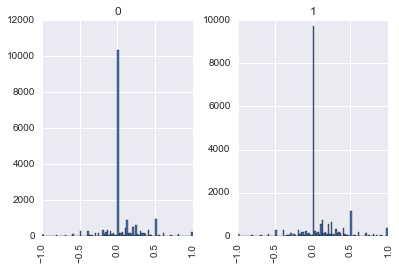

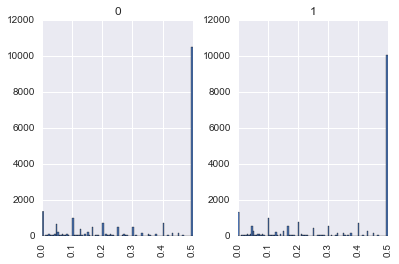

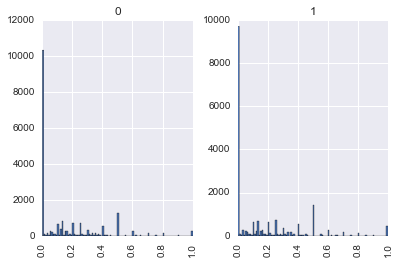

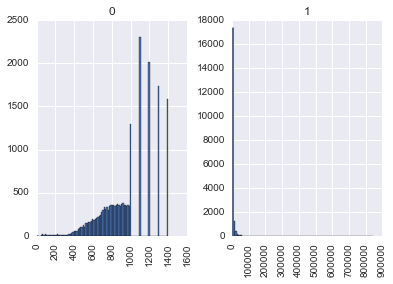

In [78]:
for i in columns:
    fig, ax = plt.subplots()
    df.hist(column=i, by='morethan1400', bins=100, ax=ax)
    filename = str(i)+".pdf"
    fig.savefig(filename)

    

In [67]:
df.hist?

In [7]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,morethan1400
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1,0.815385,4,2,1,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1,0.791946,3,1,1,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1,0.663866,3,1,1,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1,0.665635,9,0,1,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1,0.540890,19,19,20,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1,0.698198,2,2,0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,0
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1,0.549834,21,20,20,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,0
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1,0.572108,20,20,20,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,0
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1,0.836735,2,0,0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,1
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1,0.797101,4,1,1,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,0


In [ ]:
# bins = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000,30000, 40000, 50000,]
# binstrings = []
# for i in bins:
#     if i ==0:
#         pass
#     else:
#         string = str(str(i) + '+')
#         binstrings.append(string)

In [ ]:
# df['binned_shares'] = pd.cut(df['shares'],bins, labels = binstrings )

In [ ]:
# df['binned_shares'].describe()

In [ ]:
# class_df = df.drop(['shares'], axis=1)
# class_df = class_df.drop('timedelta', axis=1)

In [8]:
class_df = df.set_index('url')

In [9]:
class_df.columns.values

array(['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [33]:
y = class_df['morethan1400']
X = class_df.drop(['shares','timedelta','self_reference_avg_sharess','self_reference_min_shares','self_reference_max_shares','morethan1400'], axis=1)
# y = df['morethan1400']
# X = df.drop('morethan1400', axis=1)
# X = X.drop('binned_shares',axis=1)
# X = X.drop('shares',axis=1)
# X = X.drop('timedelta', axis=1)
# X = X.drop('url', axis=1)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [35]:
kneighbordict = {}
for i in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    kneighbordict[i]=score
print (kneighbordict)
max(kneighbordict, key=kneighbordict.get)

{1: 0.5411131663023373, 2: 0.54153354632587858, 3: 0.55885320329577937, 4: 0.54825962670253914, 5: 0.5563309231545317, 6: 0.55439717504624175, 7: 0.56061879939465276, 8: 0.55523793509332442, 9: 0.55557423911215742, 10: 0.55902135530519592, 11: 0.55986211535227848, 12: 0.55549016310744914, 13: 0.56499075163948209, 14: 0.56028249537581976, 15: 0.56793341180427104, 16: 0.56541113166302337, 17: 0.57381873213384904, 18: 0.57011938792668571, 19: 0.57373465612914076, 20: 0.56826971582310404}


17

In [36]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.metrics import confusion_matrix

In [37]:
logisticmodel = LogisticRegression()
logisticmodel = logisticmodel.fit(X_train, y_train)
logisticpredict = logisticmodel.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logisticpredict)
print(logistic_accuracy)


0.594585505297


In [47]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc

def modelaccuracy(alg):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('model: ' + str(alg) + ' Accuracy: ' + str(accuracy))

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
modelaccuracy(GaussianNB())

model: GaussianNB() Accuracy: 0.544728434505


In [48]:
modelaccuracy(SVC())

model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) Accuracy: 0.503194888179


In [40]:
modelaccuracy(DecisionTreeClassifier())

model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') Accuracy: 0.571128299983


In [41]:
modelaccuracy(RandomForestClassifier())

model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Accuracy: 0.619219774676


In [42]:
def modelaccuracy(alg, X_train, X_test, y_train, y_test):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: ' + str(accuracy))
    print(classification_report(y_test, y_predict))
    

In [43]:
print ('Model: KNN')
modelaccuracy(KNeighborsClassifier(n_neighbors=29), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Logistic Regression')
modelaccuracy(LogisticRegression(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Gaussian NB')
modelaccuracy(GaussianNB(), X_train, X_test, y_train, y_test) 
print('\n')
# print ('Model: SVC')
# modelaccuracy(SVC(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Decision Tree')
modelaccuracy(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: KNN
Accuracy: 0.569951235917
             precision    recall  f1-score   support

          0       0.57      0.62      0.59      5987
          1       0.57      0.52      0.55      5907

avg / total       0.57      0.57      0.57     11894



Model: Logistic Regression
Accuracy: 0.592651757188
             precision    recall  f1-score   support

          0       0.58      0.67      0.62      5987
          1       0.61      0.52      0.56      5907

avg / total       0.59      0.59      0.59     11894



Model: Gaussian NB
Accuracy: 0.544728434505
             precision    recall  f1-score   support

          0       0.53      0.88      0.66      5987
          1       0.63      0.20      0.31      5907

avg / total       0.58      0.54      0.49     11894





Model: Decision Tree
Accuracy: 0.573062048091
             precision    recall  f1-score   support

          0       0.57      0.59      0.58      5987
          1       0.57      0.56      0.57      5907

avg / to

In [ ]:
import statsmodels.api as sm    #import statsmodels for the stats models
model = sm.OLS(y_train, X_train).fit()
pred_test = model.predict(X_test)
print(accuracy_score(y_test, pred_test )) 
model.summary()